In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.transform import resize
from tqdm import tqdm

In [2]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras import backend as K

In [3]:
class Model():
    def __init__(self):
        K.set_learning_phase(0)
        self.model = ResNet50()
        self.input_size = (224, 224)
        
    def run_on_batch(self, x):
        return self.model.predict(x)

In [4]:
from keras.preprocessing import image

In [5]:
def load_img(path):
    img = image.load_img(path, target_size=model.input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [6]:
def generate_masks(N, s, p1):
    cell_size = np.ceil(np.array(model.input_size) / s)
    up_size = (s + 1) * cell_size

    grid = np.random.rand(N, s, s) < p1
    grid = grid.astype('float32')

    masks = np.empty((N, *model.input_size))

    for i in tqdm(range(N), desc='Generating masks'):
        # Random shifts
        x = np.random.randint(0, cell_size[0])
        y = np.random.randint(0, cell_size[1])
        # Linear upsampling and cropping
        masks[i, :, :] = resize(grid[i], up_size, order=1, mode='reflect',
                                anti_aliasing=False)[x:x + model.input_size[0], y:y + model.input_size[1]]
    masks = masks.reshape(-1, *model.input_size, 1)
    return masks

In [53]:
batch_size = 100

def explain(model, inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
        print('np.concatenate(preds).shape', np.concatenate(preds).shape)
        print('masks.shape', masks.shape)    
    preds = np.concatenate(preds)
    sal = preds.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)
    sal = sal / N / p1
    return sal

In [59]:
def explain2(model, inp, reference_inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(model.run_on_batch(masked[i:min(i+batch_size, N)]))
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [89]:
def explain3(model, inp, reference_inp, masks):
    preds = []
    # Make sure multiplication is being done for correct axes
    masked = inp * masks
    for i in tqdm(range(0, N, batch_size), desc='Explaining'):
        preds.append(2*model.run_on_batch(masked[i:min(i+batch_size, N)]) -1)
    preds = np.concatenate(preds)

    reference_pred = model.run_on_batch(reference_inp)
    distances = pairwise_distances(preds, reference_pred, metric='cosine') / 2
    print('distances.shape', distances.shape)

    sal = distances.T.dot(masks.reshape(N, -1)).reshape(-1, *model.input_size)

    sal = sal / N / p1
    return sal

In [43]:
from keras.backend import concatenate
import scipy


u = np.array([[1,0]])
v = np.array([[-1,0]])

# [for e in v]
w = np.concatenate((u,v))

scipy.spatial.distance.cosine(u, v, w=None)

2.0

In [42]:
from sklearn.metrics import pairwise_kernels, pairwise_distances
pairwise_distances(u, w, metric='cosine')

array([[0.        , 0.12712844]])

In [8]:
def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [9]:


model = Model()



/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


102981632/102967424 [==============================] - 1s 0us/step


In [69]:
!wget https://www.lomondhillslabradoodles.co.uk/wp-content/uploads/2018/12/IMG_4531-e1549365547619.jpg

--2022-04-12 14:28:57--  https://www.lomondhillslabradoodles.co.uk/wp-content/uploads/2018/12/IMG_4531-e1549365547619.jpg
Resolving www.lomondhillslabradoodles.co.uk (www.lomondhillslabradoodles.co.uk)... 185.3.164.157
Connecting to www.lomondhillslabradoodles.co.uk (www.lomondhillslabradoodles.co.uk)|185.3.164.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 783182 (765K) [image/jpeg]
Saving to: ‘IMG_4531-e1549365547619.jpg’

IMG_4531-e154936554 100%[===================>] 764.83K  1.15MB/s    in 0.7s    

2022-04-12 14:28:58 (1.15 MB/s) - ‘IMG_4531-e1549365547619.jpg’ saved [783182/783182]



In [65]:
!wget https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg

--2022-04-12 14:26:47--  https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg
Resolving www.keystonepuppies.com (www.keystonepuppies.com)... 67.227.148.146
Connecting to www.keystonepuppies.com (www.keystonepuppies.com)|67.227.148.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72816 (71K) [image/jpeg]
Saving to: ‘Tike-Mini-Labradoodle.jpg’

Tike-Mini-Labradood 100%[===================>]  71.11K  --.-KB/s    in 0.04s   

2022-04-12 14:26:47 (1.93 MB/s) - ‘Tike-Mini-Labradoodle.jpg’ saved [72816/72816]



In [70]:
urls = ['https://www.keystonepuppies.com/wp-content/uploads/2019/05/Tike-Mini-Labradoodle.jpg',
        'http://pinelodgelabradoodles.com/wp-content/uploads/2018/03/Katie_sq.jpg']
dog1_file_name = 'Tike-Mini-Labradoodle.jpg'
dog2_file_name = 'IMG_4531-e1549365547619.jpg'
# flowers_file_name = 'mc-farm-fresh-flowers-farmers-markets-20150915'

img_dog1, x_dog1 = load_img(dog1_file_name)
img_dog2, x_dog2 = load_img(dog2_file_name)
# img_flowers, x_flowers = load_img(flowers_file_name)


In [ ]:
emb_dog1 = model.run_on_batch(x_dog1)
emb_dog2 = model.run_on_batch(x_dog2)
emb_flowers = model.run_on_batch(x_flowers)

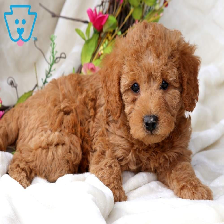

In [ ]:
img_dog1

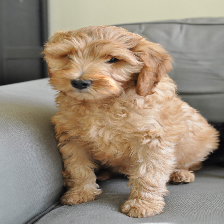

In [ ]:
img_dog2

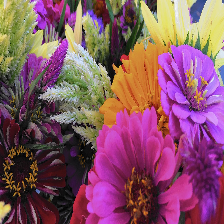

In [ ]:
img_flowers

In [85]:
N = 1000
s = 8
p1 = 0.5
masks = generate_masks(N, 8, 0.1)

Generating masks: 100%|██████████| 1000/1000 [00:05<00:00, 193.44it/s]


In [90]:
sal = explain3(model, x_dog1, x_dog2, masks)

Explaining: 100%|██████████| 10/10 [02:29<00:00, 14.95s/it]


distances.shape (1000, 1)


In [86]:
sal.shape


(1, 224, 224)

c*N . N*d => c*d
1*N . N*d => 1*d

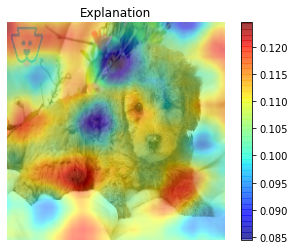

In [91]:
class_idx = 413
plt.title('Explanation')
plt.axis('off')
plt.imshow(img_dog1)
# plt.imshow(sal[0], cmap='jet', alpha=0.5, vmin=0, vmax=1)
plt.imshow(sal[0], cmap='jet', alpha=0.5) #, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [ ]:
np.argmax(model.run_on_batch(x_dog1))


267